<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-100-HOT-songs:-Create-DB" data-toc-modified-id="1.-100-HOT-songs:-Create-DB-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. 100 HOT songs: Create DB</a></span><ul class="toc-item"><li><span><a href="#1.1.-Get-the-Song's-name" data-toc-modified-id="1.1.-Get-the-Song's-name-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.1. Get the Song's name</a></span></li><li><span><a href="#1.2.-Get-the-Artist-name" data-toc-modified-id="1.2.-Get-the-Artist-name-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1.2. Get the Artist name</a></span></li><li><span><a href="#1.3.-Built-the-data-frame-with-the-information-scrapped" data-toc-modified-id="1.3.-Built-the-data-frame-with-the-information-scrapped-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>1.3. Built the data frame with the information scrapped</a></span></li><li><span><a href="#1.4.-Integrate-all-the-code-from--scrapping-to-create-the-songs-data-base-in-a-function" data-toc-modified-id="1.4.-Integrate-all-the-code-from--scrapping-to-create-the-songs-data-base-in-a-function-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>1.4. Integrate all the code from  scrapping to create the songs data base in a function</a></span></li></ul></li><li><span><a href="#2.-100-HOT-songs:-implement-audio-features" data-toc-modified-id="2.-100-HOT-songs:-implement-audio-features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. 100 HOT songs: implement audio features</a></span><ul class="toc-item"><li><span><a href="#2.1.-Handeling-Spotify-API" data-toc-modified-id="2.1.-Handeling-Spotify-API-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2.1. Handeling Spotify API</a></span></li><li><span><a href="#2.2.-Quering-from-one-song" data-toc-modified-id="2.2.-Quering-from-one-song-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2. Quering from one song</a></span><ul class="toc-item"><li><span><a href="#2.2.1.-Looking-for-the-song-ID" data-toc-modified-id="2.2.1.-Looking-for-the-song-ID-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>2.2.1. Looking for the song ID</a></span></li><li><span><a href="#2.2.1.-With-the-ID-accessing-to-the-audio-features" data-toc-modified-id="2.2.1.-With-the-ID-accessing-to-the-audio-features-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>2.2.1. With the ID accessing to the audio features</a></span></li></ul></li><li><span><a href="#2.3.-Quering-all-the-songs-in-once" data-toc-modified-id="2.3.-Quering-all-the-songs-in-once-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>2.3. Quering all the songs in once</a></span><ul class="toc-item"><li><span><a href="#2.3.1.-Get-all-ID's-for-our-Hot-Songs" data-toc-modified-id="2.3.1.-Get-all-ID's-for-our-Hot-Songs-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>2.3.1. Get all ID's for our Hot Songs</a></span></li><li><span><a href="#2.3.2.-Get-audio-feaures-for-all-ID's-for-our-Hot-Songs" data-toc-modified-id="2.3.2.-Get-audio-feaures-for-all-ID's-for-our-Hot-Songs-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>2.3.2. Get audio feaures for all ID's for our Hot Songs</a></span></li></ul></li><li><span><a href="#2.4.-Merging-audio-features-with-previous-DF-for-Hot-Songs" data-toc-modified-id="2.4.-Merging-audio-features-with-previous-DF-for-Hot-Songs-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>2.4. Merging audio features with previous DF for Hot Songs</a></span></li></ul></li><li><span><a href="#3.-Spotify:-Create-DB" data-toc-modified-id="3.-Spotify:-Create-DB-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. Spotify: Create DB</a></span><ul class="toc-item"><li><span><a href="#3.1.-Retrive-tracks-from-playlist" data-toc-modified-id="3.1.-Retrive-tracks-from-playlist-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>3.1. Retrive tracks from playlist</a></span></li><li><span><a href="#3.2.-Get-audio-features-for-playlist" data-toc-modified-id="3.2.-Get-audio-features-for-playlist-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>3.2. Get audio features for playlist</a></span></li><li><span><a href="#3.3.-Put-all-together" data-toc-modified-id="3.3.-Put-all-together-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>3.3. Put all together</a></span></li></ul></li><li><span><a href="#4.-PUT-BOTH-DB-TOGETHER-FOR-K-MEANS-AND-GET-LABELS" data-toc-modified-id="4.-PUT-BOTH-DB-TOGETHER-FOR-K-MEANS-AND-GET-LABELS-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. PUT BOTH DB TOGETHER FOR K-MEANS AND GET LABELS</a></span><ul class="toc-item"><li><span><a href="#5.1.-Concatenate-data-frames" data-toc-modified-id="5.1.-Concatenate-data-frames-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>5.1. Concatenate data frames</a></span></li><li><span><a href="#5.2-Select-the-audio-features-interested-(train-model-in-another-file)" data-toc-modified-id="5.2-Select-the-audio-features-interested-(train-model-in-another-file)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>5.2 Select the audio features interested (train model in another file)</a></span></li><li><span><a href="#4.4-Add-labels-and-export-each-DB" data-toc-modified-id="4.4-Add-labels-and-export-each-DB-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>4.4 Add labels and export each DB</a></span></li></ul></li></ul></div>

# Project Week 3 - Desired music recommender

## 1. 100 HOT songs: Create DB

Today's objective is to create a function to scrape the [Billaboards 100 HOT songs](https://www.billboard.com/charts/hot-100) and create a local dataframe of songs with them inluding:

- Song's name
- Song's artist

It is important to get artist because maybe there are song with similar name.

In [3]:
# 1. import libraries
import requests # to download html code
from bs4 import BeautifulSoup # to navigate through the html code
import pandas as pd
import numpy as np
import re

In [4]:
# 2. find url and store it in a variable
url = "https://www.billboard.com/charts/hot-100"

In [5]:
# 3. download html with a get request. Use the function request.get() and store the output in response
response = requests.get(url)
# 200 status code means OK! response.status_code
print(response.status_code)

200


In [6]:
# 4.1. parse html (create the 'soup')
soup = BeautifulSoup(response.text, 'html.parser')
# 4.2. check that the html code looks like it should
#print(soup.prettify())#it is too much, so I will skip this

### 1.1. Get the Song's name

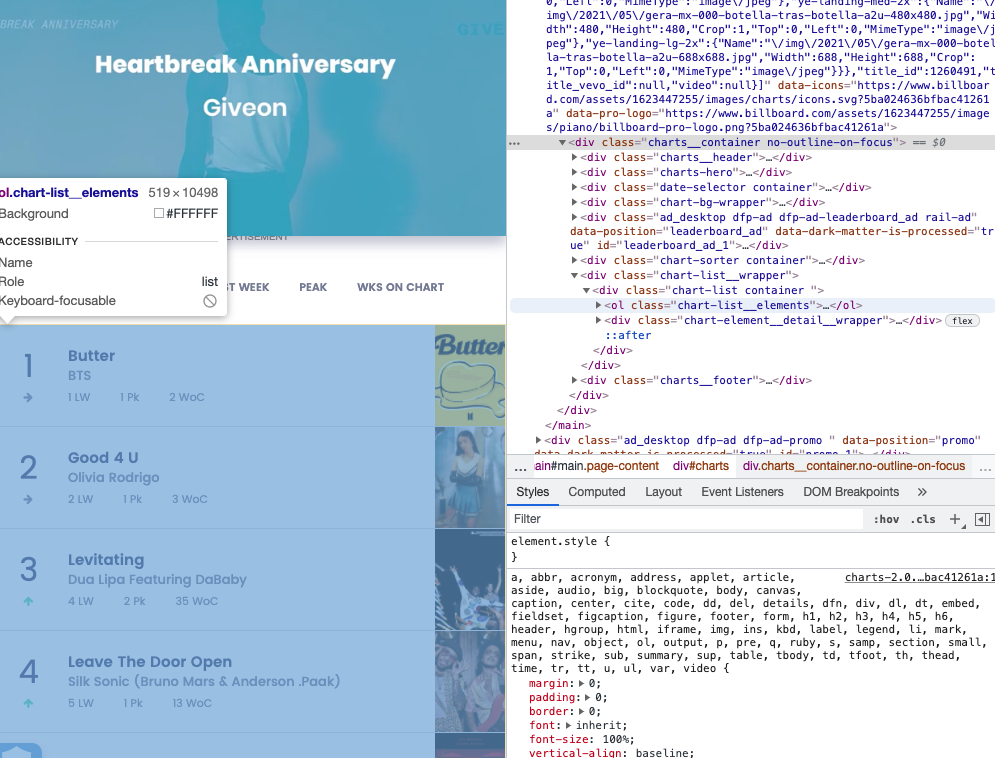

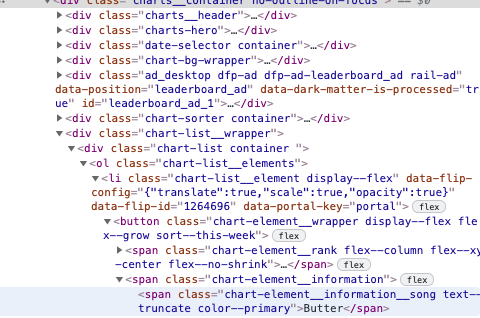

In [7]:
info_songs=soup.select("span.chart-element__information span")
info_songs
#this is not what we want, we have other info
#We are looking for:

#1. Title song: <span class="chart-element__information__song text--truncate 
#color--primary">Butter</span>
#2. Group song<span class="chart-element__information__artist 
#text--truncate color--secondary">BTS</span>
#then i have it for later

[<span class="chart-element__information__song text--truncate color--primary">Butter</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">BTS</span>,
 <span class="chart-element__information__delta color--secondary">
 <span class="chart-element__information__delta__text text--default">-</span>
 <span class="chart-element__information__delta__text text--last">1 Last Week</span>
 <span class="chart-element__information__delta__text text--peak">1 Peak Rank</span>
 <span class="chart-element__information__delta__text text--week">3 Weeks on Chart</span>
 </span>,
 <span class="chart-element__information__delta__text text--default">-</span>,
 <span class="chart-element__information__delta__text text--last">1 Last Week</span>,
 <span class="chart-element__information__delta__text text--peak">1 Peak Rank</span>,
 <span class="chart-element__information__delta__text text--week">3 Weeks on Chart</span>,
 <span class="chart-element__information__song text--tru

In [8]:
titles_songs=soup.find_all("span", {"class":"chart-element__information__song text--truncate color--primary"})
titles_songs

[<span class="chart-element__information__song text--truncate color--primary">Butter</span>,
 <span class="chart-element__information__song text--truncate color--primary">Good 4 U</span>,
 <span class="chart-element__information__song text--truncate color--primary">Levitating</span>,
 <span class="chart-element__information__song text--truncate color--primary">Peaches</span>,
 <span class="chart-element__information__song text--truncate color--primary">Leave The Door Open</span>,
 <span class="chart-element__information__song text--truncate color--primary">Save Your Tears</span>,
 <span class="chart-element__information__song text--truncate color--primary">Kiss Me More</span>,
 <span class="chart-element__information__song text--truncate color--primary">Astronaut In The Ocean</span>,
 <span class="chart-element__information__song text--truncate color--primary">Deja Vu</span>,
 <span class="chart-element__information__song text--truncate color--primary">Yonaguni</span>,
 <span class="ch

In [9]:
songs=[elem.get_text() for elem in titles_songs]
songs

['Butter',
 'Good 4 U',
 'Levitating',
 'Peaches',
 'Leave The Door Open',
 'Save Your Tears',
 'Kiss Me More',
 'Astronaut In The Ocean',
 'Deja Vu',
 'Yonaguni',
 'Montero (Call Me By Your Name)',
 'Without You',
 'Forever After All',
 'Rapstar',
 'Blinding Lights',
 'Hats Off',
 'Drivers License',
 'Beautiful Mistakes',
 'Traitor',
 'Late At Night',
 'Voice Of The Heroes',
 'Best Friend',
 'Heartbreak Anniversary',
 'Heat Waves',
 'Calling My Phone',
 'Favorite Crime',
 'Lost Cause',
 'Happier',
 'Up',
 'Mood',
 '2040',
 'Every Chance I Get',
 'Telepatia',
 'How It Feels',
 'Brutal',
 'Wockesha',
 'Wants And Needs',
 'Famous Friends',
 'pov',
 'Gone',
 'Beat Box',
 "My Ex's Best Friend",
 'Still Runnin',
 'Track Star',
 'What You Know Bout Love',
 'Who I Want',
 'my.life',
 'Back In Blood',
 'Time Today',
 'Lil Bit',
 'Blame It On You',
 'Nobody',
 'Todo de Ti',
 'Enough For You',
 'Settling Down',
 'Still Hood',
 'Jealousy, Jealousy',
 'Okay',
 'Almost Maybes',
 'Man Of My Word',
 

### 1.2. Get the Artist name

In [10]:
# Group song<span class="chart-element__information__artist 
#text--truncate color--secondary">BTS</span>

artists_names=soup.find_all("span", {"class":"chart-element__information__artist"})
#text--truncate color--secondary"})
artists_names

[<span class="chart-element__information__artist text--truncate color--secondary">BTS</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Olivia Rodrigo</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Dua Lipa Featuring DaBaby</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Justin Bieber Featuring Daniel Caesar &amp; Giveon</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Silk Sonic (Bruno Mars &amp; Anderson .Paak)</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">The Weeknd &amp; Ariana Grande</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Doja Cat Featuring SZA</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Masked Wolf</span>,
 <span class="chart-element__information__artist text--truncate color--se

In [11]:
artists =[elem.get_text() for elem in artists_names]
artists
#we see that for a song sometimes we have more than one artist
#we will need to clean this list in arttis 1, artist 2

['BTS',
 'Olivia Rodrigo',
 'Dua Lipa Featuring DaBaby',
 'Justin Bieber Featuring Daniel Caesar & Giveon',
 'Silk Sonic (Bruno Mars & Anderson .Paak)',
 'The Weeknd & Ariana Grande',
 'Doja Cat Featuring SZA',
 'Masked Wolf',
 'Olivia Rodrigo',
 'Bad Bunny',
 'Lil Nas X',
 'The Kid LAROI',
 'Luke Combs',
 'Polo G',
 'The Weeknd',
 'Lil Baby, Lil Durk & Travis Scott',
 'Olivia Rodrigo',
 'Maroon 5 Featuring Megan Thee Stallion',
 'Olivia Rodrigo',
 'Roddy Ricch',
 'Lil Baby & Lil Durk',
 'Saweetie Featuring Doja Cat',
 'Giveon',
 'Glass Animals',
 'Lil Tjay Featuring 6LACK',
 'Olivia Rodrigo',
 'Billie Eilish',
 'Olivia Rodrigo',
 'Cardi B',
 '24kGoldn Featuring iann dior',
 'Lil Baby & Lil Durk',
 'DJ Khaled Featuring Lil Baby & Lil Durk',
 'Kali Uchis',
 'Lil Baby & Lil Durk',
 'Olivia Rodrigo',
 'Moneybagg Yo',
 'Drake Featuring Lil Baby',
 'Chris Young + Kane Brown',
 'Ariana Grande',
 'Dierks Bentley',
 'SpotemGottem Featuring Pooh Shiesty Or DaBaby',
 'Machine Gun Kelly X blackbe

### 1.3. Built the data frame with the information scrapped

We will create a dictionary where the keys are the features and the values the list with all this features.

In [12]:
dic_songs= {"Title":songs, "Artist":artists}

We can create a dataframe with this dictionary.

In [13]:
hot_songs= pd.DataFrame(dic_songs)
hot_songs

,Title,Artist
0,Butter,BTS
1,Good 4 U,Olivia Rodrigo
2,Levitating,Dua Lipa Featuring DaBaby
3,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon
4,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak)
...,...,...
95,Things A Man Oughta Know,Lainey Wilson
96,Country Again,Thomas Rhett
97,Drunk (And I Don't Wanna Go Home),Elle King & Miranda Lambert
98,If You Want To,Lil Baby & Lil Durk


In [14]:
hot_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   100 non-null    object
 1   Artist  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


We can transform the Artist column into other columns containing just one artist or leave it like this and have it in mind when we create the user interaction.

### 1.4. Integrate all the code from  scrapping to create the songs data base in a function

In [15]:
def scrapp_hotsongs():
    url = "https://www.billboard.com/charts/hot-100"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    titles_songs = soup.find_all("span", {"class": "chart-element__information__song text--truncate color--primary"})
    songs = [elem.get_text() for elem in titles_songs]
    artists_names = soup.find_all("span", {"class": "chart-element__information__artist"})
    artists = [elem.get_text() for elem in artists_names]
    return songs, artists

def obtain_hotsong_db(list_of_list):
    songs,artists = list_of_list
    dic_songs = {"title": songs, "artist": artists}
    hot_songs = pd.DataFrame(dic_songs)
    return hot_songs


In [16]:
hot_songs = obtain_hotsong_db(scrapp_hotsongs())

## 2. 100 HOT songs: implement audio features 

Before that we will need to get credentials for our account. Create a python file with the credentials store in the same folder, but remember to include this file on your gitignore to don't share it after on your repo. 

### 2.1. Handeling Spotify API

In [17]:
#Access to my file with the Credentials
import sys
sys.path.insert(1, "/Users/lauratll/Documents/Data_Analysis/IronHack/Week_3/Project_Week_3/Credentials/")
from config import *

In [18]:
#Import the requested libraries to work
#The installer: conda install -c conda-forge spotipy

import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import pprint

In [19]:
#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= Client_ID,
                                                           client_secret= Client_Secret))

### 2.2. Quering from one song

#### 2.2.1. Looking for the song ID

In [20]:
#First need to find the ID from the song #3Nrfpe0tUJi4K4DXYWgMUX
track_info = sp.search(q='Butter', limit=1)
pprint.pprint(track_info)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Butter&type=track&offset=0&limit=1',
            'items': [{'album': {'album_type': 'single',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3Nrfpe0tUJi4K4DXYWgMUX'},
                                              'href': 'https://api.spotify.com/v1/artists/3Nrfpe0tUJi4K4DXYWgMUX',
                                              'id': '3Nrfpe0tUJi4K4DXYWgMUX',
                                              'name': 'BTS',
                                              'type': 'artist',
                                              'uri': 'spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX'}],
                                 'available_markets': ['AD',
                                                       'AE',
                                                       'AG',
                                                       'AL',
                                                     

In [21]:
track_info["tracks"]["items"]
## 'id': '2bgTY4UwhfBYhGT4HUYStN' for the song (there is one than more version)
#'https://open.spotify.com/track/2bgTY4UwhfBYhGT4HUYStN

[{'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3Nrfpe0tUJi4K4DXYWgMUX'},
     'href': 'https://api.spotify.com/v1/artists/3Nrfpe0tUJi4K4DXYWgMUX',
     'id': '3Nrfpe0tUJi4K4DXYWgMUX',
     'name': 'BTS',
     'type': 'artist',
     'uri': 'spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BY',
    'BZ',
    'CA',
    'CH',
    'CI',
    'CL',
    'CM',
    'CO',
    'CR',
    'CV',
    'CY',
    'CZ',
    'DE',
    'DJ',
    'DK',
    'DM',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'FI',
    'FJ',
    'FM',
    'FR',
    'GA',
    'GB',
    'GD',
    'GE',
    'GH',
    'GM',
    'GN',
    'GQ',
    'GR',
    'GT',
    'GW',
    'GY',


In [22]:
track_info["tracks"]["items"][0]

{'album': {'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3Nrfpe0tUJi4K4DXYWgMUX'},
    'href': 'https://api.spotify.com/v1/artists/3Nrfpe0tUJi4K4DXYWgMUX',
    'id': '3Nrfpe0tUJi4K4DXYWgMUX',
    'name': 'BTS',
    'type': 'artist',
    'uri': 'spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR',
   'HT',
   'HU',
   'ID',
   'IE',
   'IL'

In [23]:
track_info["tracks"]["items"][0].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [24]:
track_info["tracks"]["items"][0]["id"]
#I get the ID of the song

'2bgTY4UwhfBYhGT4HUYStN'

In [25]:
track_info["tracks"]["items"][0]["name"]

'Butter'

#### 2.2.1. With the ID accessing to the audio features

In [26]:
audio_features_info= sp.audio_features(tracks=['2bgTY4UwhfBYhGT4HUYStN'])

In [27]:
audio_features_info

[{'danceability': 0.759,
  'energy': 0.459,
  'key': 8,
  'loudness': -5.187,
  'mode': 1,
  'speechiness': 0.0948,
  'acousticness': 0.00323,
  'instrumentalness': 0,
  'liveness': 0.0906,
  'valence': 0.695,
  'tempo': 109.997,
  'type': 'audio_features',
  'id': '2bgTY4UwhfBYhGT4HUYStN',
  'uri': 'spotify:track:2bgTY4UwhfBYhGT4HUYStN',
  'track_href': 'https://api.spotify.com/v1/tracks/2bgTY4UwhfBYhGT4HUYStN',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2bgTY4UwhfBYhGT4HUYStN',
  'duration_ms': 164442,
  'time_signature': 4}]

In [28]:
audio_features_info[0].keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [29]:
list(audio_features_info[0].keys())

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [30]:
butter_audio_features_dic = {key: [audio_features_info[0][key]] for key in list(audio_features_info[0].keys())}
butter_audio_features_dic['Title']= [track_info["tracks"]["items"][0]["name"]]
butter_audio_features_dic

pd.DataFrame(butter_audio_features_dic)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Title
0,0.759,0.459,8,-5.187,1,0.0948,0.00323,0,0.0906,0.695,109.997,audio_features,2bgTY4UwhfBYhGT4HUYStN,spotify:track:2bgTY4UwhfBYhGT4HUYStN,https://api.spotify.com/v1/tracks/2bgTY4UwhfBY...,https://api.spotify.com/v1/audio-analysis/2bgT...,164442,4,Butter


### 2.3. Quering all the songs in once

#### 2.3.1. Get all ID's for our Hot Songs

In [31]:
#We need to use our lists of Hot Songs, We will get arttis name, id and name of the song from the Tiles

list_hot_songs = hot_songs["title"].to_list()
# list_hot_artists = hot_songs["Artist"].to_list()

#track_info = sp.search(q=list_hot_songs)
#pprint.pprint(track_info)

In [33]:
def get_id_name_title_from_track(tracks_list):
    list_id = [] 
    list_names = []
    list_artists = []
    for track in tracks_list:
        track_info = sp.search(q=track,limit=1)
#         seconds_to_wait = randint(2,7)
#         sleep(seconds_to_wait)
        track_id = track_info["tracks"]["items"][0]["id"]
        track_name = track_info["tracks"]["items"][0]["name"]
        track_artist = track_info["tracks"]["items"][0]["artists"]
        track_artist2 =[elem["name"] for elem in track_artist]
        track_artist3 = ", ".join(track_artist2)
        list_id.append(track_id)
        list_names.append(track_name)
        list_artists.append(track_artist3)
    return list_id,list_names,list_artists

In [34]:
id_hot,title_hot,artist_hot = get_id_name_title_from_track(list_hot_songs)

In [35]:
id_hot

['2bgTY4UwhfBYhGT4HUYStN',
 '6PERP62TejQjgHu81OHxgM',
 '463CkQjx2Zk1yXoBuierM9',
 '4iJyoBOLtHqaGxP12qzhQI',
 '7MAibcTli4IisCtbHKrGMh',
 '37BZB0z9T8Xu7U3e65qxFy',
 '748mdHapucXQri7IAO8yFK',
 '3Ofmpyhv5UAQ70mENzB277',
 '6HU7h9RYOaPRFeh0R3UeAr',
 '2JPLbjOn0wPCngEot2STUS',
 '67BtfxlNbhBmCDR2L2l8qd',
 '27OeeYzk6klgBh83TSvGMA',
 '6IBcOGPsniK3Pso1wHIhew',
 '43PGPuHIlVOc04jrZVh9L6',
 '0VjIjW4GlUZAMYd2vXMi3b',
 '4lUmnwRybYH7mMzf16xB0y',
 '5wANPM4fQCJwkGd4rN57mH',
 '6fRxMU4LWwyaSSowV441IU',
 '5CZ40GBx1sQ9agT82CLQCT',
 '1fxYz1s15pyZLsJT0Hdh1m',
 '3E3pb3qH11iny6TFDJvsg5',
 '2etHQJxIbV0soyPhelVs9Y',
 '3FAJ6O0NOHQV8Mc5Ri6ENp',
 '3USxtqRwSYz57Ewm6wWRMp',
 '3J8EOeKLTLXORtWPpOU5bE',
 '5JCoSi02qi3jJeHdZXMmR8',
 '2xdwCJLfKCkat14mlgR26M',
 '2tGvwE8GcFKwNdAXMnlbfl',
 '1XXimziG1uhM0eDNCZCrUl',
 '4jPy3l0RUwlUI9T5XHBW2m',
 '2ELp0EL65yitpfJYwc5983',
 '1EJIcDYXwSqipW5dFe4uJz',
 '6tDDoYIxWvMLTdKpjFkc1B',
 '62nb5YUYUqtYJhVPwRhCke',
 '6SRsiMl7w1USE4mFqrOhHC',
 '0nqhKXDjsyBMvbeWmgijD0',
 '65OVbaJR5O1RmwOQx0875b',
 

In [ ]:
# titles_id= {}
# from time import sleep
# from random import randint

# def get_id_name_title_from_track(tracks_list,artists_list):
#     list_id = [] 
#     list_names = []
#     list_artists = []
#     for track,artist in zip(list_hot_songs,list_hot_artists):
#         try:
#             track_info = sp.search(q="track:"+track+" artist:"+artist,limit=2)
#         except PermissionError:
#             track_info = sp.search(q=track,limit=1)
            
# #         seconds_to_wait = randint(2,7)
# #         sleep(seconds_to_wait)
#         track_id = track_info["tracks"]["items"][0]["id"]
#         track_name = track_info["tracks"]["items"][0]["name"]
#         track_artist =[elem["name"] for elem in track_info["tracks"]["items"][0]["artists"]]
#         track_artist2 = ", ".join(track_artist)
#         list_id.append(track_id)
#         list_names.append(track_name)
#         list_artists.append(track_artist2)
#     return list_id,list_names,list_artists



    
# #I like to obtain a dictionary with this information    
#     titles_ids["artist"] = list of the artris
#     titles_ids["Title"] = list of the titles
#     titles_ids["id"] =  list of ids --> we will later use for retrieving the audio features


In [ ]:
# id_hot,title_hot,artist_hot =get_id_name_title_from_track(list_hot_songs,list_hot_artists)

#### 2.3.2. Get audio feaures for all ID's for our Hot Songs

In [36]:
audio_features_info= sp.audio_features(tracks=id_hot)
audio_features_info

[{'danceability': 0.759,
  'energy': 0.459,
  'key': 8,
  'loudness': -5.187,
  'mode': 1,
  'speechiness': 0.0948,
  'acousticness': 0.00323,
  'instrumentalness': 0,
  'liveness': 0.0906,
  'valence': 0.695,
  'tempo': 109.997,
  'type': 'audio_features',
  'id': '2bgTY4UwhfBYhGT4HUYStN',
  'uri': 'spotify:track:2bgTY4UwhfBYhGT4HUYStN',
  'track_href': 'https://api.spotify.com/v1/tracks/2bgTY4UwhfBYhGT4HUYStN',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2bgTY4UwhfBYhGT4HUYStN',
  'duration_ms': 164442,
  'time_signature': 4},
 {'danceability': 0.556,
  'energy': 0.661,
  'key': 6,
  'loudness': -5.052,
  'mode': 0,
  'speechiness': 0.204,
  'acousticness': 0.3,
  'instrumentalness': 0,
  'liveness': 0.101,
  'valence': 0.668,
  'tempo': 168.56,
  'type': 'audio_features',
  'id': '6PERP62TejQjgHu81OHxgM',
  'uri': 'spotify:track:6PERP62TejQjgHu81OHxgM',
  'track_href': 'https://api.spotify.com/v1/tracks/6PERP62TejQjgHu81OHxgM',
  'analysis_url': 'https://api.spotify

In [37]:
hot_extra_features = pd.DataFrame(audio_features_info)
hot_extra_features["SongId"] = id_hot
hot_extra_features["title"] = title_hot
hot_extra_features["artists"] = artist_hot

In [38]:
hot_extra_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,SongId,title,artists
0,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.0,0.0906,0.695,...,audio_features,2bgTY4UwhfBYhGT4HUYStN,spotify:track:2bgTY4UwhfBYhGT4HUYStN,https://api.spotify.com/v1/tracks/2bgTY4UwhfBY...,https://api.spotify.com/v1/audio-analysis/2bgT...,164442,4,2bgTY4UwhfBYhGT4HUYStN,Butter,BTS
1,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.0,0.1010,0.668,...,audio_features,6PERP62TejQjgHu81OHxgM,spotify:track:6PERP62TejQjgHu81OHxgM,https://api.spotify.com/v1/tracks/6PERP62TejQj...,https://api.spotify.com/v1/audio-analysis/6PER...,178148,4,6PERP62TejQjgHu81OHxgM,good 4 u,Olivia Rodrigo
2,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.0,0.0674,0.915,...,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4,463CkQjx2Zk1yXoBuierM9,Levitating (feat. DaBaby),"Dua Lipa, DaBaby"
3,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.0,0.4200,0.464,...,audio_features,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...,https://api.spotify.com/v1/audio-analysis/4iJy...,198082,4,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon"
4,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.0,0.0927,0.719,...,audio_features,7MAibcTli4IisCtbHKrGMh,spotify:track:7MAibcTli4IisCtbHKrGMh,https://api.spotify.com/v1/tracks/7MAibcTli4Ii...,https://api.spotify.com/v1/audio-analysis/7MAi...,242096,4,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,"Bruno Mars, Anderson .Paak, Silk Sonic"


In [39]:
hot_extra_features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'SongId', 'title', 'artists'],
      dtype='object')

In [40]:
hot_extra_features.iloc[:,:-2]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,SongId
0,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.000000,0.0906,0.695,109.997,audio_features,2bgTY4UwhfBYhGT4HUYStN,spotify:track:2bgTY4UwhfBYhGT4HUYStN,https://api.spotify.com/v1/tracks/2bgTY4UwhfBY...,https://api.spotify.com/v1/audio-analysis/2bgT...,164442,4,2bgTY4UwhfBYhGT4HUYStN
1,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.000000,0.1010,0.668,168.560,audio_features,6PERP62TejQjgHu81OHxgM,spotify:track:6PERP62TejQjgHu81OHxgM,https://api.spotify.com/v1/tracks/6PERP62TejQj...,https://api.spotify.com/v1/audio-analysis/6PER...,178148,4,6PERP62TejQjgHu81OHxgM
2,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4,463CkQjx2Zk1yXoBuierM9
3,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,audio_features,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...,https://api.spotify.com/v1/audio-analysis/4iJy...,198082,4,4iJyoBOLtHqaGxP12qzhQI
4,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,audio_features,7MAibcTli4IisCtbHKrGMh,spotify:track:7MAibcTli4IisCtbHKrGMh,https://api.spotify.com/v1/tracks/7MAibcTli4Ii...,https://api.spotify.com/v1/audio-analysis/7MAi...,242096,4,7MAibcTli4IisCtbHKrGMh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.659,0.683,3,-5.623,1,0.0312,0.51300,0.000005,0.1330,0.397,139.931,audio_features,5QS8PNEWbqTEZyQ6e9ZbJf,spotify:track:5QS8PNEWbqTEZyQ6e9ZbJf,https://api.spotify.com/v1/tracks/5QS8PNEWbqTE...,https://api.spotify.com/v1/audio-analysis/5QS8...,203373,4,5QS8PNEWbqTEZyQ6e9ZbJf
96,0.467,0.481,2,-6.947,1,0.0255,0.22700,0.000189,0.1100,0.248,147.886,audio_features,3CiF9D8iuVhZWDvvjf8HpG,spotify:track:3CiF9D8iuVhZWDvvjf8HpG,https://api.spotify.com/v1/tracks/3CiF9D8iuVhZ...,https://api.spotify.com/v1/audio-analysis/3CiF...,221240,4,3CiF9D8iuVhZWDvvjf8HpG
97,0.612,0.884,5,-4.400,1,0.0459,0.00516,0.000000,0.0997,0.626,119.991,audio_features,0QULNNd9z5s35entfiiXoa,spotify:track:0QULNNd9z5s35entfiiXoa,https://api.spotify.com/v1/tracks/0QULNNd9z5s3...,https://api.spotify.com/v1/audio-analysis/0QUL...,245626,4,0QULNNd9z5s35entfiiXoa
98,0.795,0.599,6,-7.819,1,0.1230,0.04140,0.000000,0.1930,0.351,97.033,audio_features,1EXRmdtTA2IEnYGiuw9plD,spotify:track:1EXRmdtTA2IEnYGiuw9plD,https://api.spotify.com/v1/tracks/1EXRmdtTA2IE...,https://api.spotify.com/v1/audio-analysis/1EXR...,195454,4,1EXRmdtTA2IEnYGiuw9plD


### 2.4. Merging audio features with previous DF for Hot Songs

In [41]:
hot_songs_df= hot_songs.join(hot_extra_features.iloc[:,:-2]) 
# In the hot_extra_features data frame, the info of th last columns is repeated 
#(title and artist), so I will just sliced the
hot_songs_df.head(10)

,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,SongId
0,Butter,BTS,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.000000,...,0.695,109.997,audio_features,2bgTY4UwhfBYhGT4HUYStN,spotify:track:2bgTY4UwhfBYhGT4HUYStN,https://api.spotify.com/v1/tracks/2bgTY4UwhfBY...,https://api.spotify.com/v1/audio-analysis/2bgT...,164442,4,2bgTY4UwhfBYhGT4HUYStN
1,Good 4 U,Olivia Rodrigo,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.000000,...,0.668,168.560,audio_features,6PERP62TejQjgHu81OHxgM,spotify:track:6PERP62TejQjgHu81OHxgM,https://api.spotify.com/v1/tracks/6PERP62TejQj...,https://api.spotify.com/v1/audio-analysis/6PER...,178148,4,6PERP62TejQjgHu81OHxgM
2,Levitating,Dua Lipa Featuring DaBaby,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,...,0.915,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4,463CkQjx2Zk1yXoBuierM9
3,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,...,0.464,90.030,audio_features,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...,https://api.spotify.com/v1/audio-analysis/4iJy...,198082,4,4iJyoBOLtHqaGxP12qzhQI
4,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,...,0.719,148.088,audio_features,7MAibcTli4IisCtbHKrGMh,spotify:track:7MAibcTli4IisCtbHKrGMh,https://api.spotify.com/v1/tracks/7MAibcTli4Ii...,https://api.spotify.com/v1/audio-analysis/7MAi...,242096,4,7MAibcTli4IisCtbHKrGMh
5,Save Your Tears,The Weeknd & Ariana Grande,0.650,0.825,0,-4.645,1,0.0325,0.02150,0.000024,...,0.593,118.091,audio_features,37BZB0z9T8Xu7U3e65qxFy,spotify:track:37BZB0z9T8Xu7U3e65qxFy,https://api.spotify.com/v1/tracks/37BZB0z9T8Xu...,https://api.spotify.com/v1/audio-analysis/37BZ...,191014,4,37BZB0z9T8Xu7U3e65qxFy
6,Kiss Me More,Doja Cat Featuring SZA,0.762,0.701,8,-3.541,1,0.0286,0.23500,0.000158,...,0.742,110.968,audio_features,748mdHapucXQri7IAO8yFK,spotify:track:748mdHapucXQri7IAO8yFK,https://api.spotify.com/v1/tracks/748mdHapucXQ...,https://api.spotify.com/v1/audio-analysis/748m...,208867,4,748mdHapucXQri7IAO8yFK
7,Astronaut In The Ocean,Masked Wolf,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,...,0.472,149.996,audio_features,3Ofmpyhv5UAQ70mENzB277,spotify:track:3Ofmpyhv5UAQ70mENzB277,https://api.spotify.com/v1/tracks/3Ofmpyhv5UAQ...,https://api.spotify.com/v1/audio-analysis/3Ofm...,132780,4,3Ofmpyhv5UAQ70mENzB277
8,Deja Vu,Olivia Rodrigo,0.442,0.612,2,-7.222,1,0.1120,0.58400,0.000006,...,0.178,180.917,audio_features,6HU7h9RYOaPRFeh0R3UeAr,spotify:track:6HU7h9RYOaPRFeh0R3UeAr,https://api.spotify.com/v1/tracks/6HU7h9RYOaPR...,https://api.spotify.com/v1/audio-analysis/6HU7...,215507,4,6HU7h9RYOaPRFeh0R3UeAr
9,Yonaguni,Bad Bunny,0.644,0.648,1,-4.601,1,0.1180,0.27600,0.000000,...,0.440,179.951,audio_features,2JPLbjOn0wPCngEot2STUS,spotify:track:2JPLbjOn0wPCngEot2STUS,https://api.spotify.com/v1/tracks/2JPLbjOn0wPC...,https://api.spotify.com/v1/audio-analysis/2JPL...,206710,4,2JPLbjOn0wPCngEot2STUS


In [42]:
hot_songs_df.columns

Index(['title', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'SongId'],
      dtype='object')

In [43]:
hot_songs_df=hot_songs_df.drop(columns=["type","time_signature","analysis_url","track_href","SongId"])

In [91]:
hot_songs_df.tail(10)

,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,duration_ms
90,Chasing After You,Ryan Hurd With Maren Morris,0.596,0.679,4,-6.395,1,0.0394,0.72300,0.000000,0.1160,0.4790,131.912,1ZIKpMTRPqhwAoVXWY3tXI,spotify:track:1ZIKpMTRPqhwAoVXWY3tXI,207974
91,Tell Em,Cochise & $NOT,0.672,0.717,5,-7.476,1,0.2260,0.10300,0.000000,0.3980,0.4730,157.905,7nc7mlSdWYeFom84zZ8Wr8,spotify:track:7nc7mlSdWYeFom84zZ8Wr8,180380
92,4 Da Gang,42 Dugg & Roddy Ricch,0.871,0.545,7,-10.489,1,0.1890,0.01430,0.000000,0.1480,0.7220,100.482,4KIkADzoVm3A10E9qyjsQ5,spotify:track:4KIkADzoVm3A10E9qyjsQ5,155720
93,Tombstone,Rod Wave,0.550,0.637,8,-5.212,1,0.1630,0.59700,0.000000,0.1290,0.5350,84.448,5pRTz4O2qOkr5nawemy6Wb,spotify:track:5pRTz4O2qOkr5nawemy6Wb,160078
94,What's Next,Drake,0.777,0.580,0,-6.928,0,0.0525,0.01250,0.000000,0.1610,0.0636,129.918,3mDFLytDotXo2p0rvfGbkA,spotify:track:3mDFLytDotXo2p0rvfGbkA,178154
95,Things A Man Oughta Know,Lainey Wilson,0.659,0.683,3,-5.623,1,0.0312,0.51300,0.000005,0.1330,0.3970,139.931,5QS8PNEWbqTEZyQ6e9ZbJf,spotify:track:5QS8PNEWbqTEZyQ6e9ZbJf,203373
96,Country Again,Thomas Rhett,0.467,0.481,2,-6.947,1,0.0255,0.22700,0.000189,0.1100,0.2480,147.886,3CiF9D8iuVhZWDvvjf8HpG,spotify:track:3CiF9D8iuVhZWDvvjf8HpG,221240
97,Drunk (And I Don't Wanna Go Home),Elle King & Miranda Lambert,0.612,0.884,5,-4.400,1,0.0459,0.00516,0.000000,0.0997,0.6260,119.991,0QULNNd9z5s35entfiiXoa,spotify:track:0QULNNd9z5s35entfiiXoa,245626
98,If You Want To,Lil Baby & Lil Durk,0.795,0.599,6,-7.819,1,0.1230,0.04140,0.000000,0.1930,0.3510,97.033,1EXRmdtTA2IEnYGiuw9plD,spotify:track:1EXRmdtTA2IEnYGiuw9plD,195454
99,Seeing Green,"Nicki Minaj, Drake & Lil Wayne",0.573,0.867,5,-2.876,0,0.1680,0.08530,0.000000,0.3800,0.2310,74.861,1TZv3bujNaYz646eezRE91,spotify:track:1TZv3bujNaYz646eezRE91,339506


## 3. Spotify: Create DB

We want to create a df with arouns 10.000 song with following info:
- title
- artist
- all the audio features

### 3.1. Retrive tracks from playlist

In [45]:
###I will start quering for one playlist from my own account

#https://open.spotify.com/playlist/74J6reDDCzYBgUioSUZFbo?si=756ed10eaac74512

#This is the Playlist ID: 74J6reDDCzYBgUioSUZFbo
from time import sleep
from random import randint

In [46]:
# #results["items"][0]["track"]["name"] name of the track
# #results["items"][0]["track"]["artists"][0]["name"] name artist
##results['items'][0]["track"]["uri"] bring you to yout app and opens the song
# results = sp.user_playlist_tracks("spotify","74J6reDDCzYBgUioSUZFbo")
# for item in results["items"]: #iterate over this, each song entry
#     item["track"]["name"] #nombre de la cancion
#     item["track"]["id"] #id de la cancion
#     item["track"]["artists"][0]["name"]

In [47]:
import re
def get_ids_playlists_from_txt(path_file):
    f = open(path_file)
    playlists = f.read()
    playlists = playlists.split("\n")
    playlists = [re.findall(r"\/(\d.*)\?",playlist) for playlist in playlists]
    playlists = [elem[0] for elem in playlists]
    return playlists

In [48]:
playlists = get_ids_playlists_from_txt("../data/playlists.txt")

In [49]:
len(playlists)

43

In [50]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items'] #list, and we will extend this list
    while results['next']: #while I have a next
        results = sp.next(results)
        seconds_to_wait = randint(2,7)
        sleep(seconds_to_wait)
        tracks.extend(results['items']) #extend my list to the results before. items
    return tracks



In [51]:
def parse_all_info_playlists(playlist_list):
    all_results=[]
    for playlist in playlist_list:
        results =get_playlist_tracks("spotify",playlist)
        all_results.extend(results)
        
    return all_results

In [52]:
all_info_tracks = parse_all_info_playlists(playlists)


In [53]:
def get_info_from_the_tracks_from_parsed_info_playlist(tracks):
    name_list= []
    id_list = []
    artist_list = []

    for item in tracks:#results["items"]: #iterate over this, each song entry
        track_name = item["track"]["name"] #nombre de la cancion
        track_id = item["track"]["id"] #id de la cancion
        track_artist = item["track"]["artists"][0]["name"]
        name_list.append(track_name)
        id_list.append(track_id)
        artist_list.append(track_artist)
    return name_list,id_list,artist_list
    

In [54]:
title_spoty,id_spoty,artist_spoty = get_info_from_the_tracks_from_parsed_info_playlist(all_info_tracks)

In [55]:
tracks_spoty=pd.DataFrame({"title":title_spoty,"Id":id_spoty,"artist":artist_spoty})
tracks_spoty.tail()

,title,Id,artist
5371,"Mother Knows Best - From ""Tangled""/Soundtrack ...",1lOSxJNCLvWm2bYaTcTSmK,Donna Murphy
5372,"When Will My Life Begin? - From ""Tangled"" / So...",3HoMLZMs2Fn9HuYOIzhGqt,Mandy Moore
5373,Shiny,1IZwCzAmaFmmdJj0cmhaax,Jemaine Clement
5374,"Yodel-Adle-Eedle-Idle-Oo - From ""Home on the R...",1tEIuzIaaxu9tblCQ9yXKh,Randy Quaid
5375,(You Ain't) Home On the Range - Echo Mine Reprise,73Wue7BFfb2CEBaLdFHB1t,Chorus


In [56]:
len(tracks_spoty)
# tracks_spoty.iloc[1960:1980,:]

5376

### 3.2. Get audio features for playlist

We can just get 100 in every query, so we are gonna have to itereate every 100 ids and give a new 100 ids again.

In [57]:
# id_spoty[0:100]
# id_spoty[100:200]
# id_spoty[200:300]
# id_spoty[300:400] #when the lenght of your chunk is <100 then is finsihed

#range (statrs,stops,step)

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# pprint.pprint(list(chunks(range(10, 75), 10))  
# list(chunks(id_spoty, 100))
# len(list(chunks(id_spoty, 100)))
# list_indexes = list(range(0,500,100)) #[0, 100, 200, 300, 400]

# id_spoty[list_indexes[0]:list_indexes[1]]
# id_spoty[list_indexes[1]:list_indexes[2]]
# id_spoty[list_indexes[2]:list_indexes[3]]
# id_spoty[list_indexes[3]:list_indexes[4]]


In [58]:
#i get my chunks of 100 songs

id_spotify_chunk_100 = list(chunks(id_spoty, 100))
len(id_spotify_chunk_100)

54

In [61]:
#I need to change those two values as the id was not retrieve, it gives None, and then gives 
#an error when we try to get the audio features
id_spotify_chunk_100[19][68] ='0yfNXxlyXdmP0ue1iJijx1' 
id_spotify_chunk_100[19][67] ='0yfNXxlyXdmP0ue1iJijx1'

In [ ]:
#id_spotify_chunk_100[19][67] ='0yfNXxlyXdmP0ue1iJijx1'

In [59]:
def get_audio_features_from_id(id_chunks_of_100):
    first=True
    for chunk in id_chunks_of_100:
        audio_features_spoty= sp.audio_features(tracks=chunk)
        if first:
            all_features = audio_features_spoty
            first = False
        else:
            all_features.extend(audio_features_spoty)
    return all_features

In [62]:
all_features = get_audio_features_from_id(id_spotify_chunk_100)

In [63]:
#I have this number of songs
len(all_features)

5376

In [66]:
#Error of non type that I can not find so I just take the 4500 first ones, I will sliced also the the other
features_spoty= pd.DataFrame(all_features[:4500])
features_spoty.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.2210,0.1260,0,-25.427,1,0.0447,0.989,0.897,0.1020,0.2160,133.630,audio_features,4SFBV7SRNG2e2kyL1F6kjU,spotify:track:4SFBV7SRNG2e2kyL1F6kjU,https://api.spotify.com/v1/tracks/4SFBV7SRNG2e...,https://api.spotify.com/v1/audio-analysis/4SFB...,139307,4
1,0.0811,0.0122,4,-32.654,0,0.0511,0.902,0.308,0.0648,0.0384,74.554,audio_features,2kAgCRZPG3YQR2VMqRvLmb,spotify:track:2kAgCRZPG3YQR2VMqRvLmb,https://api.spotify.com/v1/tracks/2kAgCRZPG3YQ...,https://api.spotify.com/v1/audio-analysis/2kAg...,935360,4
2,0.0939,0.0336,2,-24.041,0,0.0606,0.927,0.830,0.0954,0.0516,67.359,audio_features,1upQiytDIEZfl9ItruoXuC,spotify:track:1upQiytDIEZfl9ItruoXuC,https://api.spotify.com/v1/tracks/1upQiytDIEZf...,https://api.spotify.com/v1/audio-analysis/1upQ...,207267,3
3,0.2300,0.0487,5,-27.675,1,0.0412,0.986,0.945,0.0679,0.1010,134.839,audio_features,0H2VhGUC3P3hvwz8rdGIpC,spotify:track:0H2VhGUC3P3hvwz8rdGIpC,https://api.spotify.com/v1/tracks/0H2VhGUC3P3h...,https://api.spotify.com/v1/audio-analysis/0H2V...,203656,5
4,0.2050,0.0525,1,-23.841,1,0.0327,0.980,0.906,0.1030,0.0511,88.316,audio_features,419qlOGNXoyICx4jO0hqaj,spotify:track:419qlOGNXoyICx4jO0hqaj,https://api.spotify.com/v1/tracks/419qlOGNXoyI...,https://api.spotify.com/v1/audio-analysis/419q...,174653,4


### 3.3. Put all together

In [67]:
tracks_spoty =tracks_spoty[:4500].reset_index(drop=True)

In [68]:
features_spoty = features_spoty.reset_index(drop=True)

In [69]:
display(tracks_spoty.tail()) 
display(features_spoty.tail()) 

,title,Id,artist
4495,All of Me - Tiësto's Birthday Treatment Remix ...,19GPhZcrElq7LdHy10NGsk,John Legend
4496,Treasured Soul - Radio Edit,2gpytjWqJVE3LICibhEUaK,Michael Calfan
4497,Moves Like Jagger - Studio Recording From The ...,7pYfyrMNPn3wtoCyqcTVoI,Maroon 5
4498,Summer,6YUTL4dYpB9xZO5qExPf05,Calvin Harris
4499,Paper Planes,1wgqttlPacpvmX5DKVboOa,M.I.A.


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
4495,0.599,0.796,5,-4.391,0,0.0295,0.00022,0.000357,0.0924,0.175,128.017,audio_features,19GPhZcrElq7LdHy10NGsk,spotify:track:19GPhZcrElq7LdHy10NGsk,https://api.spotify.com/v1/tracks/19GPhZcrElq7...,https://api.spotify.com/v1/audio-analysis/19GP...,249361,4
4496,0.623,0.833,4,-2.951,0,0.0557,0.01910,0.017400,0.3310,0.411,124.973,audio_features,2gpytjWqJVE3LICibhEUaK,spotify:track:2gpytjWqJVE3LICibhEUaK,https://api.spotify.com/v1/tracks/2gpytjWqJVE3...,https://api.spotify.com/v1/audio-analysis/2gpy...,177600,4
4497,0.722,0.761,11,-4.459,0,0.0475,0.01170,0.000000,0.3150,0.624,128.044,audio_features,7pYfyrMNPn3wtoCyqcTVoI,spotify:track:7pYfyrMNPn3wtoCyqcTVoI,https://api.spotify.com/v1/tracks/7pYfyrMNPn3w...,https://api.spotify.com/v1/audio-analysis/7pYf...,201493,4
4498,0.596,0.856,4,-3.556,0,0.0346,0.02110,0.017800,0.1410,0.743,127.949,audio_features,6YUTL4dYpB9xZO5qExPf05,spotify:track:6YUTL4dYpB9xZO5qExPf05,https://api.spotify.com/v1/tracks/6YUTL4dYpB9x...,https://api.spotify.com/v1/audio-analysis/6YUT...,222533,4
4499,0.447,0.848,2,-6.175,1,0.2220,0.03300,0.000074,0.6500,0.485,172.247,audio_features,1wgqttlPacpvmX5DKVboOa,spotify:track:1wgqttlPacpvmX5DKVboOa,https://api.spotify.com/v1/tracks/1wgqttlPacpv...,https://api.spotify.com/v1/audio-analysis/1wgq...,205200,4


In [70]:
spoty_df = tracks_spoty.join(features_spoty)
spoty_df.tail()

,title,Id,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
4495,All of Me - Tiësto's Birthday Treatment Remix ...,19GPhZcrElq7LdHy10NGsk,John Legend,0.599,0.796,5,-4.391,0,0.0295,0.00022,...,0.0924,0.175,128.017,audio_features,19GPhZcrElq7LdHy10NGsk,spotify:track:19GPhZcrElq7LdHy10NGsk,https://api.spotify.com/v1/tracks/19GPhZcrElq7...,https://api.spotify.com/v1/audio-analysis/19GP...,249361,4
4496,Treasured Soul - Radio Edit,2gpytjWqJVE3LICibhEUaK,Michael Calfan,0.623,0.833,4,-2.951,0,0.0557,0.01910,...,0.3310,0.411,124.973,audio_features,2gpytjWqJVE3LICibhEUaK,spotify:track:2gpytjWqJVE3LICibhEUaK,https://api.spotify.com/v1/tracks/2gpytjWqJVE3...,https://api.spotify.com/v1/audio-analysis/2gpy...,177600,4
4497,Moves Like Jagger - Studio Recording From The ...,7pYfyrMNPn3wtoCyqcTVoI,Maroon 5,0.722,0.761,11,-4.459,0,0.0475,0.01170,...,0.3150,0.624,128.044,audio_features,7pYfyrMNPn3wtoCyqcTVoI,spotify:track:7pYfyrMNPn3wtoCyqcTVoI,https://api.spotify.com/v1/tracks/7pYfyrMNPn3w...,https://api.spotify.com/v1/audio-analysis/7pYf...,201493,4
4498,Summer,6YUTL4dYpB9xZO5qExPf05,Calvin Harris,0.596,0.856,4,-3.556,0,0.0346,0.02110,...,0.1410,0.743,127.949,audio_features,6YUTL4dYpB9xZO5qExPf05,spotify:track:6YUTL4dYpB9xZO5qExPf05,https://api.spotify.com/v1/tracks/6YUTL4dYpB9x...,https://api.spotify.com/v1/audio-analysis/6YUT...,222533,4
4499,Paper Planes,1wgqttlPacpvmX5DKVboOa,M.I.A.,0.447,0.848,2,-6.175,1,0.2220,0.03300,...,0.6500,0.485,172.247,audio_features,1wgqttlPacpvmX5DKVboOa,spotify:track:1wgqttlPacpvmX5DKVboOa,https://api.spotify.com/v1/tracks/1wgqttlPacpv...,https://api.spotify.com/v1/audio-analysis/1wgq...,205200,4


In [71]:
spoty_df.columns

Index(['title', 'Id', 'artist', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [72]:
#Drop extra columns

spoty_df =spoty_df.drop(columns=["type","time_signature","analysis_url","track_href","Id"])

In [73]:
#Arrange the columns in the same orther as the Hotsong DB and wiht same colum names

spoty_df = spoty_df.reindex(columns=['title', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'id', 'uri', 'duration_ms'])

## 4. PUT BOTH DB TOGETHER FOR K-MEANS AND GET LABELS

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score #evaluate clustering
# import pickle #save my models trained

In [ ]:
## 4. Create groups of songs to be able to recommend from an specific group depending on the audio features

In [ ]:
display(spoty_df.tail())
display(hot_songs_df.tail())

### 5.1. Concatenate data frames

In [76]:
all_df = pd.concat([hot_songs_df, spoty_df], axis=0)

In [77]:
display(all_df.head())
display(all_df.tail())

,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,duration_ms
0,Butter,BTS,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.0,0.0906,0.695,109.997,2bgTY4UwhfBYhGT4HUYStN,spotify:track:2bgTY4UwhfBYhGT4HUYStN,164442
1,Good 4 U,Olivia Rodrigo,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.0,0.1010,0.668,168.560,6PERP62TejQjgHu81OHxgM,spotify:track:6PERP62TejQjgHu81OHxgM,178148
2,Levitating,Dua Lipa Featuring DaBaby,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.0,0.0674,0.915,102.977,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,203064
3,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.0,0.4200,0.464,90.030,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,198082
4,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),0.586,0.616,5,-7.964,1,0.0324,0.18200,0.0,0.0927,0.719,148.088,7MAibcTli4IisCtbHKrGMh,spotify:track:7MAibcTli4IisCtbHKrGMh,242096


,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,duration_ms
4495,All of Me - Tiësto's Birthday Treatment Remix ...,John Legend,0.599,0.796,5,-4.391,0,0.0295,0.00022,0.000357,0.0924,0.175,128.017,19GPhZcrElq7LdHy10NGsk,spotify:track:19GPhZcrElq7LdHy10NGsk,249361
4496,Treasured Soul - Radio Edit,Michael Calfan,0.623,0.833,4,-2.951,0,0.0557,0.01910,0.017400,0.3310,0.411,124.973,2gpytjWqJVE3LICibhEUaK,spotify:track:2gpytjWqJVE3LICibhEUaK,177600
4497,Moves Like Jagger - Studio Recording From The ...,Maroon 5,0.722,0.761,11,-4.459,0,0.0475,0.01170,0.000000,0.3150,0.624,128.044,7pYfyrMNPn3wtoCyqcTVoI,spotify:track:7pYfyrMNPn3wtoCyqcTVoI,201493
4498,Summer,Calvin Harris,0.596,0.856,4,-3.556,0,0.0346,0.02110,0.017800,0.1410,0.743,127.949,6YUTL4dYpB9xZO5qExPf05,spotify:track:6YUTL4dYpB9xZO5qExPf05,222533
4499,Paper Planes,M.I.A.,0.447,0.848,2,-6.175,1,0.2220,0.03300,0.000074,0.6500,0.485,172.247,1wgqttlPacpvmX5DKVboOa,spotify:track:1wgqttlPacpvmX5DKVboOa,205200


### 5.2 Select the audio features interested (train model in another file)

In [444]:
all_features_4_cluster =all_df[['danceability', 'energy', 'key', 'loudness', 'mode','speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo']]

In [445]:
all_features_4_cluster.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
4495,0.599,0.796,5,-4.391,0,0.0295,0.00022,0.000357,0.0924,0.175,128.017
4496,0.623,0.833,4,-2.951,0,0.0557,0.01910,0.017400,0.3310,0.411,124.973
4497,0.722,0.761,11,-4.459,0,0.0475,0.01170,0.000000,0.3150,0.624,128.044
4498,0.596,0.856,4,-3.556,0,0.0346,0.02110,0.017800,0.1410,0.743,127.949
4499,0.447,0.848,2,-6.175,1,0.2220,0.03300,0.000074,0.6500,0.485,172.247


In [446]:
###export the file

all_features_4_cluster.to_csv("../data/audio_features_for_cluster.csv")
#continue working in other file

### 4.4 Add labels and export each DB

In [84]:
#retrieve scaled table of the audio features with an additional colums for groups
audio_features_for_cluster_labeled = pd.read_csv("../data/audio_features_for_cluster_labeled.csv",index_col=False)
audio_features_for_cluster_labeled.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.0,0.0906,0.695,109.997,8
1,1,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.0,0.1010,0.668,168.560,7
2,2,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.0,0.0674,0.915,102.977,7
3,3,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.0,0.4200,0.464,90.030,2
4,4,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.0,0.0927,0.719,148.088,4


In [85]:
#a bit annoying it appears a new column all the time
#Store column caterogry in labels to add it to the
labels = audio_features_for_cluster_labeled.iloc[:,-1]

In [86]:
#Add labels column to the db
all_df["catergory"]=labels

In [87]:
all_df.head(50) #its seems ok the 100 first, that were the HoT100

,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,duration_ms,catergory
0,Butter,BTS,0.759,0.459,8,-5.187,1,0.0948,0.003230,0.000000,0.0906,0.6950,109.997,2bgTY4UwhfBYhGT4HUYStN,spotify:track:2bgTY4UwhfBYhGT4HUYStN,164442,8
1,Good 4 U,Olivia Rodrigo,0.556,0.661,6,-5.052,0,0.2040,0.300000,0.000000,0.1010,0.6680,168.560,6PERP62TejQjgHu81OHxgM,spotify:track:6PERP62TejQjgHu81OHxgM,178148,7
2,Levitating,Dua Lipa Featuring DaBaby,0.702,0.825,6,-3.787,0,0.0601,0.008830,0.000000,0.0674,0.9150,102.977,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,203064,7
3,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,0.677,0.696,0,-6.181,1,0.1190,0.321000,0.000000,0.4200,0.4640,90.030,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,198082,2
4,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),0.586,0.616,5,-7.964,1,0.0324,0.182000,0.000000,0.0927,0.7190,148.088,7MAibcTli4IisCtbHKrGMh,spotify:track:7MAibcTli4IisCtbHKrGMh,242096,4
5,Save Your Tears,The Weeknd & Ariana Grande,0.650,0.825,0,-4.645,1,0.0325,0.021500,0.000024,0.0936,0.5930,118.091,37BZB0z9T8Xu7U3e65qxFy,spotify:track:37BZB0z9T8Xu7U3e65qxFy,191014,2
6,Kiss Me More,Doja Cat Featuring SZA,0.762,0.701,8,-3.541,1,0.0286,0.235000,0.000158,0.1230,0.7420,110.968,748mdHapucXQri7IAO8yFK,spotify:track:748mdHapucXQri7IAO8yFK,208867,8
7,Astronaut In The Ocean,Masked Wolf,0.778,0.695,4,-6.865,0,0.0913,0.175000,0.000000,0.1500,0.4720,149.996,3Ofmpyhv5UAQ70mENzB277,spotify:track:3Ofmpyhv5UAQ70mENzB277,132780,7
8,Deja Vu,Olivia Rodrigo,0.442,0.612,2,-7.222,1,0.1120,0.584000,0.000006,0.3700,0.1780,180.917,6HU7h9RYOaPRFeh0R3UeAr,spotify:track:6HU7h9RYOaPRFeh0R3UeAr,215507,4
9,Yonaguni,Bad Bunny,0.644,0.648,1,-4.601,1,0.1180,0.276000,0.000000,0.1350,0.4400,179.951,2JPLbjOn0wPCngEot2STUS,spotify:track:2JPLbjOn0wPCngEot2STUS,206710,4


In [95]:
#Obtain our original HotSong DF with labels
hot_songs_df= all_df.iloc[:100,:]

In [96]:
#Obtain our original Spoty DF with labels
hot_songs_df = all_df.iloc[100:,:]

In [97]:
hot_songs_df.to_csv("../data/hotsongs_db.csv")

In [98]:
spoty_df.to_csv("../data/spotify_db.csv")

In [ ]:
# #Export file to use it later 

# all_df.to_csv("../data/All_db_with_categories")